# The Pie
How Does Human Evolution Distribute Non-Financial Wealth?
<br> Dave Costenaro, March 2023

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read in data from csv
df = pd.read_csv('The Pie - Data.csv')
print("Dataframe rows & columns: ", df.shape)
df.head()

Dataframe rows & columns:  (455, 16)


,Category,Category2,Description,Order in Series,Incremental Percent of Population,Cumulative Percent of Population,Resource Level of this Segment,Units,Resource Level as Percent of Max,Segment Area = Resource Level * Segment Size,Cumulative Resource Level,Cumulative Percent of Resource,Cumulative Percent of Resource IF EQUALLY DISTRIBUTED,Area under Lorenz Curve,Gini Coefficient,Color
0,Financial,Income,Income (Global 2021 USD),1,0.00,0.00,0.0,US dollars,0.0000,0.00,0.00,0.0000,0.00,0.00000,0.68,gold
1,Financial,Income,Income (Global 2021 USD),2,0.10,0.10,750.0,US dollars,0.0008,75.00,75.00,0.0034,0.10,0.00017,0.68,gold
2,Financial,Income,Income (Global 2021 USD),3,0.05,0.15,1500.0,US dollars,0.0015,75.00,150.00,0.0068,0.15,0.00025,0.68,gold
3,Financial,Income,Income (Global 2021 USD),4,0.05,0.20,2200.0,US dollars,0.0022,110.00,260.00,0.0118,0.20,0.00046,0.68,gold
4,Financial,Income,Income (Global 2021 USD),5,0.10,0.30,3300.0,US dollars,0.0033,330.00,590.00,0.0267,0.30,0.00193,0.68,gold


In [3]:
# create legend labels based on column 2
labels = df['Description'].unique().tolist()
print(labels, '\n')

# create series based on categories from column 2
series = [df[df['Description']==label] for label in labels]
print("Total available series: ", len(series), '\n')

['Income (Global 2021 USD)', 'Income (United States 2021 USD)', 'Income (United States, After Taxes & Transfers 2021 USD)', 'Income (Norway, After Taxes & Transfers 2021 USD)', 'Income (Germany 2021 USD)', 'Income (Canada 2021 USD)', 'Wealth (Global 2021 USD)', 'Wealth (United States 2019 USD)', 'Wealth (Canada 2019 USD)', 'Wealth (Norway 2018 USD)', 'Wealth (Greece 2018 USD)', 'Wealth (Japan 2019 USD)', 'Height (cm, global adult males)', 'Height (cm, global adult females)', 'IQ', 'Number of Digits Memorized', 'Weight (lbs, US adult males)', 'Weight (lbs, US adult females)', 'Male Beauty from Female POV', 'Female Beauty from Male POV', 'Average Beauty Score (1 to 5)', 'Life Expectancy (years, global 1950)', 'Life Expectancy (years, global 2020)', 'Life Expectancy (years, US 2020)', 'Running Speed (mph, global adults)', 'Max Benchpress (lbs, global adults)', 'Relationships (# Facebook Friends 2015)', "Females' Relationships (# Facebook Friends 2015)", "Males' Relationships (# Facebook F

## Make repeatable function for plotting Lorenz curve

In [4]:
def make_lorenz_curve(series_list, marker_list, linestyle_list):
    # create figure
    fig, ax = plt.subplots(figsize=(10,7))

    # iterate through series, adding each to the graph with distinct color, pattern, and thickness
    for i, ser_description in enumerate(series_list):
        ser = df[df['Description']==ser_description]

        ax.plot(ser['Cumulative Percent of Population'].values, 
                    ser['Cumulative Percent of Resource'].values,
                    color = ser['Color'].iloc[0],
                    marker = marker_list[i],
                    linestyle = linestyle_list[i],
                    label = str("(Gini=" + str(ser['Gini Coefficient'].iloc[0]) + ") " + ser_description)
                   )

    # add title, legend and labels
    ax.set_title('Lorenz Curve of Resource Distribution', color='0.3', fontsize=16)
    # ax.legend(loc='center right')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11)
    ax.set_xlabel('Cumulative Percent of Population', color='0.3', fontsize=12)
    ax.set_ylabel('Cumulative Percent of Resource', color='0.3', fontsize=12)

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # return matplotlib object "plt"
    return plt

## Lorenz Curve of Traditional Income & Wealth Distribution

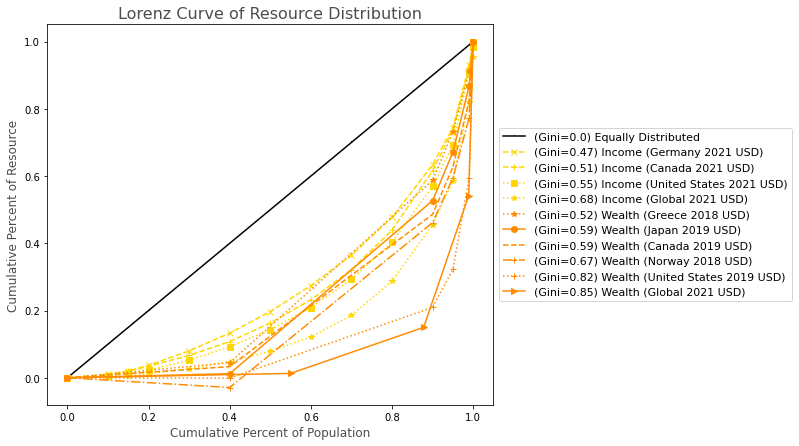

In [5]:
series_list_fin = [
    'Equally Distributed',

    'Income (Germany 2021 USD)',
    'Income (Canada 2021 USD)',
    'Income (United States 2021 USD)',
    'Income (Global 2021 USD)',
    'Wealth (Greece 2018 USD)',
    'Wealth (Japan 2019 USD)',
    'Wealth (Canada 2019 USD)',
    'Wealth (Norway 2018 USD)',
    'Wealth (United States 2019 USD)',
    'Wealth (Global 2021 USD)'
]

linestyle_list_fin = ['-', '--', '--', ':', ':', ':', '-', '--', '-.', ':', '-', '--', '-.',
                ]

marker_list_fin = [',', 'x', '+', 's', '*', '*', 'o', ',', '+', '+', '>', '^', 'D',
                ]

# show plot
plt = make_lorenz_curve(series_list_fin, marker_list_fin, linestyle_list_fin)
plt.show()

## Lorenz - add natural attributes

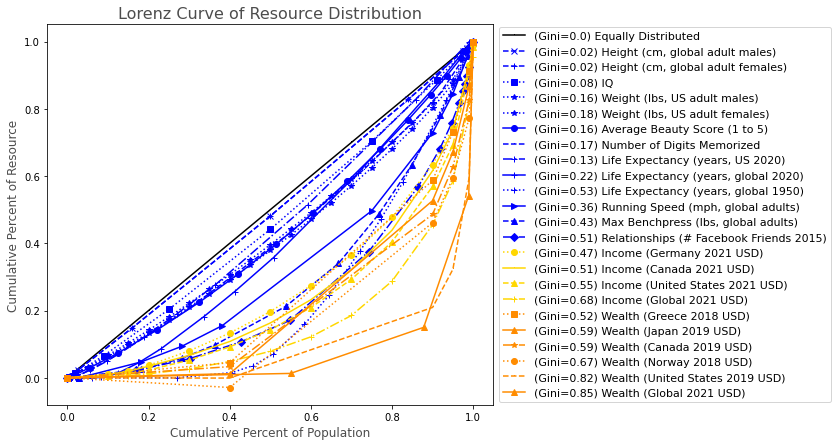

In [6]:
series_list_nat = [
    'Equally Distributed',

    'Height (cm, global adult males)',
    'Height (cm, global adult females)',
    'IQ',
    'Weight (lbs, US adult males)',
    'Weight (lbs, US adult females)',
    'Average Beauty Score (1 to 5)',
    'Number of Digits Memorized',
    'Life Expectancy (years, US 2020)',
    'Life Expectancy (years, global 2020)',
    'Life Expectancy (years, global 1950)',
    'Running Speed (mph, global adults)',
    'Max Benchpress (lbs, global adults)',
    'Relationships (# Facebook Friends 2015)',

    'Income (Germany 2021 USD)',
    'Income (Canada 2021 USD)',
    'Income (United States 2021 USD)',
    'Income (Global 2021 USD)',
    'Wealth (Greece 2018 USD)',
    'Wealth (Japan 2019 USD)',
    'Wealth (Canada 2019 USD)',
    'Wealth (Norway 2018 USD)',
    'Wealth (United States 2019 USD)',
    'Wealth (Global 2021 USD)'

]

linestyle_list_nat = ['-', '--', '--', ':', ':', ':', '-', '--', '-.', '-', ':', '-', '--', '-.',
                  ':', '-', '--', '-.', ':', '-', '-.', ':', '--', '-']

marker_list_nat = [',', 'x', '+', 's', '*', '*', 'o', ',', '+', '+', '+', '>', '^', 'D',
               'o', ',', '^', '+', 's', '^', '*', 'o', ',', '^']

# show plot
plt = make_lorenz_curve(series_list_nat, marker_list_nat, linestyle_list_nat)
plt.show()

## Lorenz - add taxes and transfers

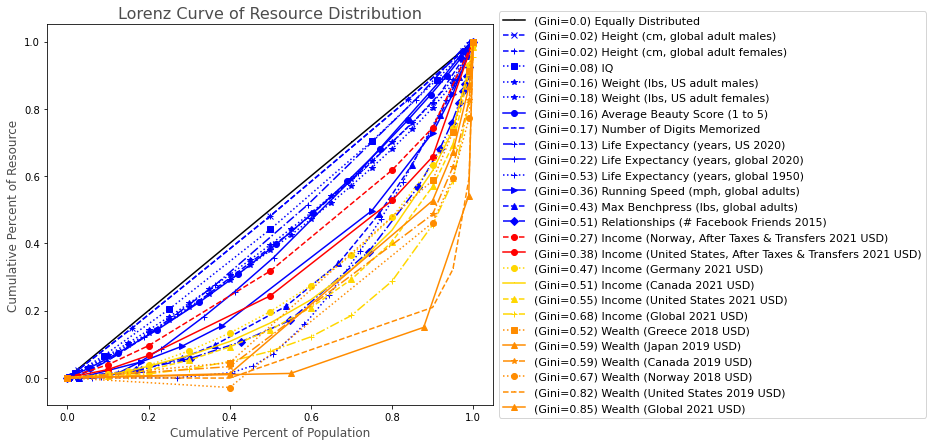

In [7]:
series_list_tt = [
    'Equally Distributed',

    'Height (cm, global adult males)',
    'Height (cm, global adult females)',
    'IQ',
    'Weight (lbs, US adult males)',
    'Weight (lbs, US adult females)',
    'Average Beauty Score (1 to 5)',
    'Number of Digits Memorized',
    'Life Expectancy (years, US 2020)',
    'Life Expectancy (years, global 2020)',
    'Life Expectancy (years, global 1950)',
    'Running Speed (mph, global adults)',
    'Max Benchpress (lbs, global adults)',
    'Relationships (# Facebook Friends 2015)',

    'Income (Norway, After Taxes & Transfers 2021 USD)',
    'Income (United States, After Taxes & Transfers 2021 USD)',    
    
    'Income (Germany 2021 USD)',
    'Income (Canada 2021 USD)',
    'Income (United States 2021 USD)',
    'Income (Global 2021 USD)',
    'Wealth (Greece 2018 USD)',
    'Wealth (Japan 2019 USD)',
    'Wealth (Canada 2019 USD)',
    'Wealth (Norway 2018 USD)',
    'Wealth (United States 2019 USD)',
    'Wealth (Global 2021 USD)',


]

linestyle_list_tt = ['-', '--', '--', ':', ':', ':', '-', '--', '-.', '-', ':', '-', '--', '-.',
                  '--', '-',
                  ':', '-', '--', '-.', ':', '-', '-.', ':', '--', '-', ]

marker_list_tt = [',', 'x', '+', 's', '*', '*', 'o', ',', '+', '+', '+', '>', '^', 'D',
               'o', 'o',
               'o', ',', '^', '+', 's', '^', '*', 'o', ',', '^', ]


# Show plot
plt = make_lorenz_curve(series_list_tt, marker_list_tt, linestyle_list_tt)
plt.show()

## Bar Graph to look more simply at Gini Coefficient

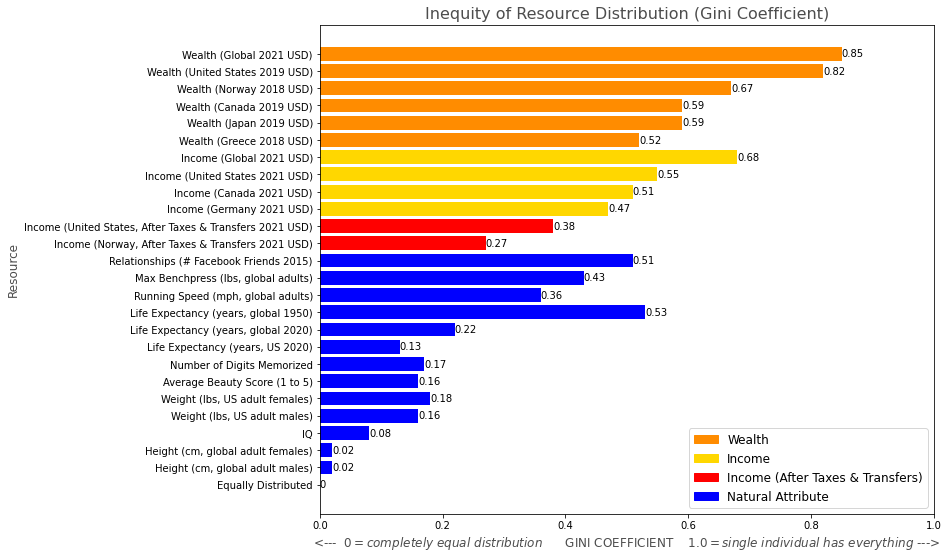

In [8]:
series_list = series_list_tt

# create figure
fig, ax = plt.subplots(figsize=(11,9))

bar_names=[]
heights=[]
bar_colors=[]
bar_labels=[]


# iterate through series, adding each to the graph with distinct color, pattern, and thickness
for i, ser_description in enumerate(series_list):
    ser = df[df['Description']==ser_description]
    
    bar_names.append(ser_description)
    heights.append(ser['Gini Coefficient'].iloc[0])
    bar_colors.append(ser['Color'].iloc[0])
    bar_labels.append(ser['Gini Coefficient'].iloc[0])
    
plotty = ax.barh(bar_names, heights, color=bar_colors, label=bar_labels)

# add title, legend and labels
ax.set_title('Inequity of Resource Distribution (Gini Coefficient)', color='0.3', fontsize=16)
ax.set_xlabel('<---  $\mathit{0=completely}$ $\mathit{equal}$ $\mathit{distribution}$      GINI COEFFICIENT\
    $\mathit{1.0=single}$ $\mathit{individual}$ $\mathit{has}$ $\mathit{everything}$ --->', color='0.3', fontsize=12)
ax.set_ylabel('Resource', color='0.3', fontsize=12)
ax.bar_label(plotty, label_type='edge')

# Legend for categories
import matplotlib.patches as mpatches
equal_patch = mpatches.Patch(color='black', label='Equally Distributed')
income_patch = mpatches.Patch(color='gold', label='Income')
wealth_patch = mpatches.Patch(color='darkorange', label='Wealth')
natural_patch = mpatches.Patch(color='blue', label='Natural Attribute')
income_adj_patch = mpatches.Patch(color='red', label='Income (After Taxes & Transfers)')
crypto_patch = mpatches.Patch(color='green', label='Cryptocurrency')

ax.legend(handles=[wealth_patch, income_patch, income_adj_patch, natural_patch ], loc="lower right", fontsize=12)
ax.set_xlim([0, 1.0])

# show plot
plt.show()


## Resource Level as Percent of Max

In [23]:
def make_max_normalized_curve(series_list, marker_list, linestyle_list):

    # create figure
    fig, ax = plt.subplots(figsize=(10,7))

    # iterate through series, adding each to the graph with distinct color, pattern, and thickness
    for i, ser_description in enumerate(series_list):
        ser = df[df['Description']==ser_description]

        ax.plot(ser['Cumulative Percent of Population'].values, 
                    ser['Resource Level as Percent of Max'].values,  # <--- CHANGE HERE FROM LORENZ 
                    color = ser['Color'].iloc[0],
                    marker = marker_list[i],
                    linestyle = linestyle_list[i],
                    label = str("(Gini=" + str(ser['Gini Coefficient'].iloc[0]) + ") " + ser_description)
                   )

    # add title, legend and labels
    ax.set_title('Resource Level as Percent of Population Maximum', color='0.3', fontsize=16)
    # ax.legend(loc='center right')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=11)
    ax.set_xlabel('Cumulative Percent of Population', color='0.3', fontsize=12)
    ax.set_ylabel('Resource Level as Percent of Maximum', color='0.3', fontsize=12)

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#     plt.yscale('log')
    
    # return matplotlib object "plt"
    return plt

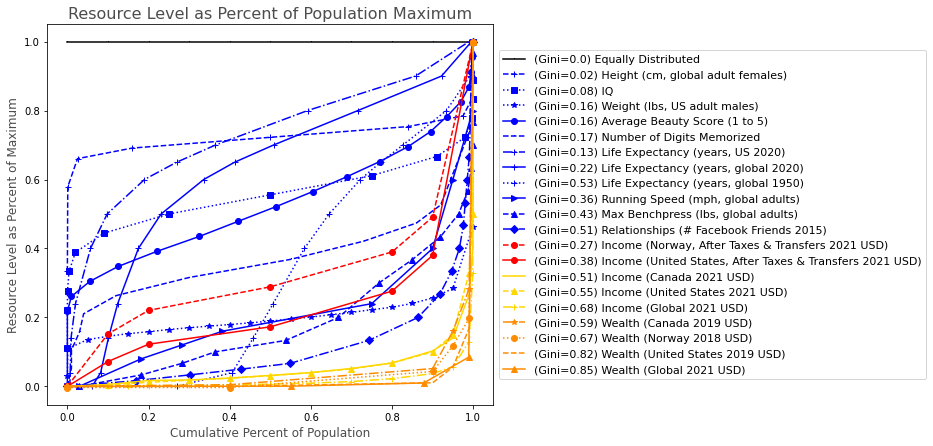

In [24]:
series_list_max_norm = [
    'Equally Distributed',

#     'Height (cm, global adult males)',
    'Height (cm, global adult females)',
    'IQ',
    'Weight (lbs, US adult males)',
#     'Weight (lbs, US adult females)',
    'Average Beauty Score (1 to 5)',
    'Number of Digits Memorized',
    'Life Expectancy (years, US 2020)',
    'Life Expectancy (years, global 2020)',
    'Life Expectancy (years, global 1950)',
    'Running Speed (mph, global adults)',
    'Max Benchpress (lbs, global adults)',
    'Relationships (# Facebook Friends 2015)',
    
    'Income (Norway, After Taxes & Transfers 2021 USD)',
    'Income (United States, After Taxes & Transfers 2021 USD)',    
    
#     'Income (Germany 2021 USD)',
    'Income (Canada 2021 USD)',
    'Income (United States 2021 USD)',
    'Income (Global 2021 USD)',
#     'Wealth (Greece 2018 USD)',
#     'Wealth (Japan 2019 USD)',
    'Wealth (Canada 2019 USD)',
    'Wealth (Norway 2018 USD)',
    'Wealth (United States 2019 USD)',
    'Wealth (Global 2021 USD)',
]

linestyle_list_max_norm = ['-', 
#                          '--', 
                         '--', ':', ':', 
#                          ':', 
                         '-', '--', '-.', '-', ':', '-', '--', '-.',
                         
                  '--', '-',
                         
#                   ':', 
                         '-', '--', '-.', 
#                          ':', '-',
                         '-.', ':', '--', '-', 
 ]

marker_list_max_norm = [',',
#                       'x',
                      '+', 's', '*',
#                       '*', 
                      'o', ',', '+', '+', '+', '>', '^', 'D',
                      
               'o', 'o',
                      
#                'o', 
                      ',', '^', '+',
#                       's', '^',
                      '*', 'o', ',', '^', 
 ]

# Show plot
plt = make_max_normalized_curve(series_list_max_norm, marker_list_max_norm, linestyle_list_max_norm)
plt.show()

## Zoom in on Natural Attributes to Show Correlation between Gini & "Editability" 

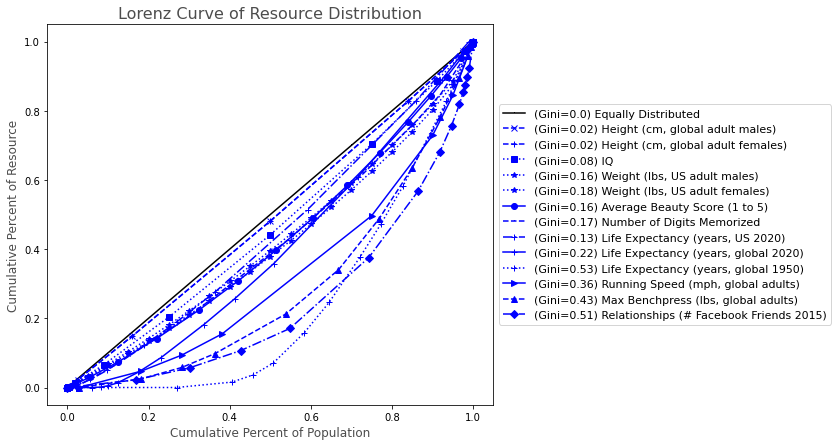

In [11]:
series_list_nat_only = [
    'Equally Distributed',

    'Height (cm, global adult males)',
    'Height (cm, global adult females)',
    'IQ',
    'Weight (lbs, US adult males)',
    'Weight (lbs, US adult females)',
    'Average Beauty Score (1 to 5)',
    'Number of Digits Memorized',
    'Life Expectancy (years, US 2020)',
    'Life Expectancy (years, global 2020)',
    'Life Expectancy (years, global 1950)',
    'Running Speed (mph, global adults)',
    'Max Benchpress (lbs, global adults)',
    'Relationships (# Facebook Friends 2015)',
]

linestyle_list_nat_only = ['-', '--', '--', ':', ':', ':', '-', '--', '-.', '-', ':', '-', '--', '-.',
]

marker_list_nat_only = [',', 'x', '+', 's', '*', '*', 'o', ',', '+', '+', '+', '>', '^', 'D',
]

# show plot
plt = make_lorenz_curve(series_list_nat_only, marker_list_nat_only, linestyle_list_nat_only)
plt.show()

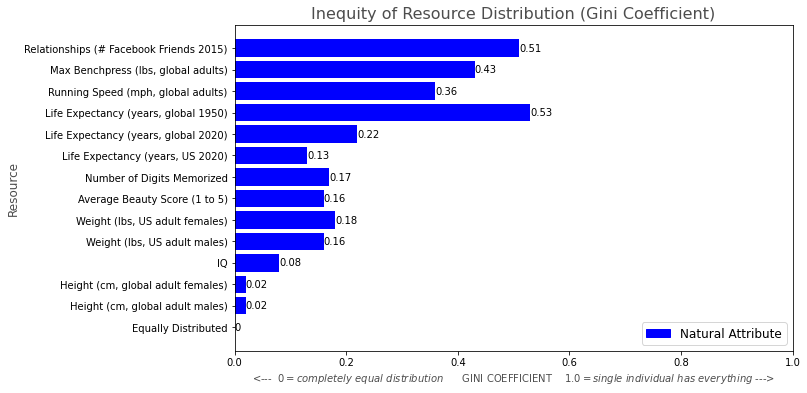

In [12]:
series_list = series_list_nat_only

# create figure
fig, ax = plt.subplots(figsize=(10,6))

bar_names=[]
heights=[]
bar_colors=[]
bar_labels=[]


# iterate through series, adding each to the graph with distinct color, pattern, and thickness
for i, ser_description in enumerate(series_list):
    ser = df[df['Description']==ser_description]
    
    bar_names.append(ser_description)
    heights.append(ser['Gini Coefficient'].iloc[0])
    bar_colors.append(ser['Color'].iloc[0])
    bar_labels.append(ser['Gini Coefficient'].iloc[0])
    
plotty = ax.barh(bar_names, heights, color=bar_colors, label=bar_labels)

# add title, legend and labels
ax.set_title('Inequity of Resource Distribution (Gini Coefficient)', color='0.3', fontsize=16)
ax.set_xlabel('<---  $\mathit{0=completely}$ $\mathit{equal}$ $\mathit{distribution}$      GINI COEFFICIENT\
    $\mathit{1.0=single}$ $\mathit{individual}$ $\mathit{has}$ $\mathit{everything}$ --->', color='0.3', fontsize=10)
ax.set_ylabel('Resource', color='0.3', fontsize=12)
ax.bar_label(plotty, label_type='edge')

# Legend for categories
import matplotlib.patches as mpatches
equal_patch = mpatches.Patch(color='black', label='Equally Distributed')
income_patch = mpatches.Patch(color='gold', label='Income')
wealth_patch = mpatches.Patch(color='darkorange', label='Wealth')
natural_patch = mpatches.Patch(color='blue', label='Natural Attribute')
income_adj_patch = mpatches.Patch(color='red', label='Income (After Taxes & Transfers)')
crypto_patch = mpatches.Patch(color='green', label='Cryptocurrency')

ax.legend(handles=[natural_patch ], loc="lower right", fontsize=12)
ax.set_xlim([0, 1.0])

# show plot
plt.show()


# CRYPTO ADDENDUM

## Lorenz - Add Cryptocurrencies - Big Caveats around Address are not 1-for-1 with People...
(and remove less critical previous data points to keep a manageable graphic)

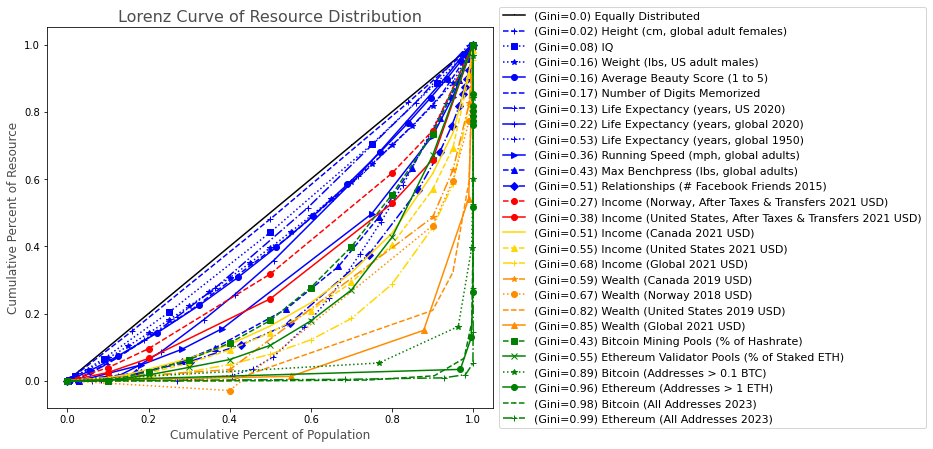

In [13]:
series_list_crypto = [
    'Equally Distributed',

#     'Height (cm, global adult males)',
    'Height (cm, global adult females)',
    'IQ',
    'Weight (lbs, US adult males)',
#     'Weight (lbs, US adult females)',
    'Average Beauty Score (1 to 5)',
    'Number of Digits Memorized',
    'Life Expectancy (years, US 2020)',
    'Life Expectancy (years, global 2020)',
    'Life Expectancy (years, global 1950)',
    'Running Speed (mph, global adults)',
    'Max Benchpress (lbs, global adults)',
    'Relationships (# Facebook Friends 2015)',
    
    'Income (Norway, After Taxes & Transfers 2021 USD)',
    'Income (United States, After Taxes & Transfers 2021 USD)',    
    
#     'Income (Germany 2021 USD)',
    'Income (Canada 2021 USD)',
    'Income (United States 2021 USD)',
    'Income (Global 2021 USD)',
#     'Wealth (Greece 2018 USD)',
#     'Wealth (Japan 2019 USD)',
    'Wealth (Canada 2019 USD)',
    'Wealth (Norway 2018 USD)',
    'Wealth (United States 2019 USD)',
    'Wealth (Global 2021 USD)',

    'Bitcoin Mining Pools (% of Hashrate)',
    'Ethereum Validator Pools (% of Staked ETH)',
    'Bitcoin (Addresses > 0.1 BTC)',
    'Ethereum (Addresses > 1 ETH)',
    'Bitcoin (All Addresses 2023)',
    'Ethereum (All Addresses 2023)'

]

linestyle_list_crypto = ['-', 
#                          '--', 
                         '--', ':', ':', 
#                          ':', 
                         '-', '--', '-.', '-', ':', '-', '--', '-.',
                         
                  '--', '-',
                         
#                   ':', 
                         '-', '--', '-.', 
#                          ':', '-',
                         '-.', ':', '--', '-', 
                         
                  '--', '-', ':', '-', '--', '-.'  ]

marker_list_crypto = [',',
#                       'x',
                      '+', 's', '*',
#                       '*', 
                      'o', ',', '+', '+', '+', '>', '^', 'D',
                      
               'o', 'o',
                      
#                'o', 
                      ',', '^', '+',
#                       's', '^',
                      '*', 'o', ',', '^', 
                      
               's', 'x', '*', 'o', ',', '+'  ]

# Show plot
plt = make_lorenz_curve(series_list_crypto, marker_list_crypto, linestyle_list_crypto)
plt.show()

## Bar Graph w CRYPTO

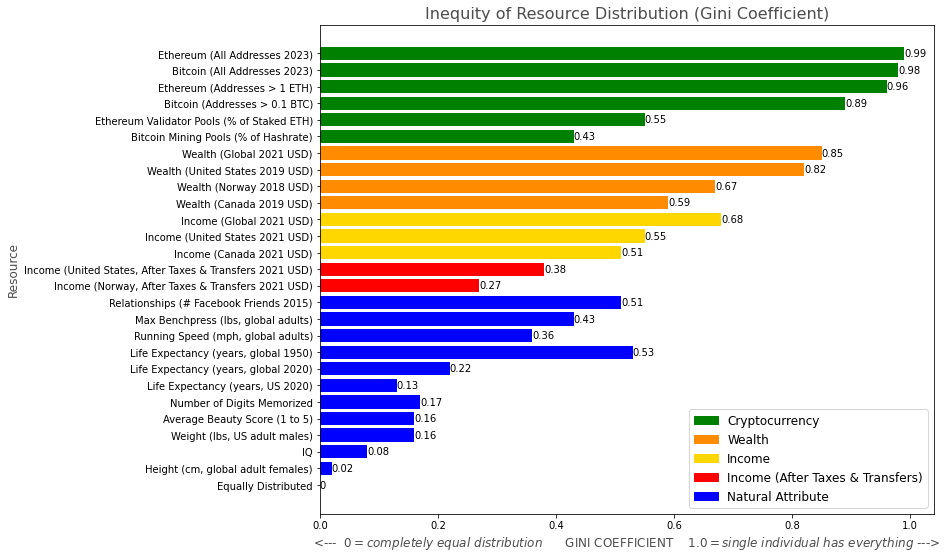

In [14]:
series_list = series_list_crypto

# create figure
fig, ax = plt.subplots(figsize=(11,9))

bar_names=[]
heights=[]
bar_colors=[]
bar_labels=[]


# iterate through series, adding each to the graph with distinct color, pattern, and thickness
for i, ser_description in enumerate(series_list):
    ser = df[df['Description']==ser_description]
    
    bar_names.append(ser_description)
    heights.append(ser['Gini Coefficient'].iloc[0])
    bar_colors.append(ser['Color'].iloc[0])
    bar_labels.append(ser['Gini Coefficient'].iloc[0])
    
plotty = ax.barh(bar_names, heights, color=bar_colors, label=bar_labels)

# add title, legend and labels
ax.set_title('Inequity of Resource Distribution (Gini Coefficient)', color='0.3', fontsize=16)
ax.set_xlabel('<---  $\mathit{0=completely}$ $\mathit{equal}$ $\mathit{distribution}$      GINI COEFFICIENT\
    $\mathit{1.0=single}$ $\mathit{individual}$ $\mathit{has}$ $\mathit{everything}$ --->', color='0.3', fontsize=12)
ax.set_ylabel('Resource', color='0.3', fontsize=12)
ax.bar_label(plotty, label_type='edge')

# Legend for categories
import matplotlib.patches as mpatches
equal_patch = mpatches.Patch(color='black', label='Equally Distributed')
income_patch = mpatches.Patch(color='gold', label='Income')
wealth_patch = mpatches.Patch(color='darkorange', label='Wealth')
natural_patch = mpatches.Patch(color='blue', label='Natural Attribute')
income_adj_patch = mpatches.Patch(color='red', label='Income (After Taxes & Transfers)')
crypto_patch = mpatches.Patch(color='green', label='Cryptocurrency')

ax.legend(handles=[crypto_patch, wealth_patch, income_patch, income_adj_patch, natural_patch ], loc="lower right", fontsize=12)
# ax.set_xlim([0, 1.0])

# show plot
plt.show()
